In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
print("Success")

Success


In [2]:
df = pd.read_csv('fods_1.csv')
df

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979
...,...,...,...
541,3.326,2.837,4.651
542,3.275,2.727,3.953
543,5.165,3.111,6.219
544,2.859,2.614,4.995


In [3]:
meanX1 = df['MLOGP'].mean()
meanX2 = df['RDCHI'].mean()
meanY = df['quantitative response of LC50'].mean()
stdX1 = df['MLOGP'].std()
stdX2 = df['RDCHI'].std()
stdY = df['quantitative response of LC50'].std()
print(meanX1, meanX2, meanY, stdX1, stdX2, stdY)

2.3134926739926738 2.4922985347985356 4.6584212454212475 1.741797285664983 0.8110039291512505 1.6652150617992907


In [4]:
# standardization
df['MLOGP'] = (df['MLOGP'] - meanX1)/stdX1
df['RDCHI'] = (df['RDCHI'] - meanX2)/stdX2
df['quantitative response of LC50'] = (df['quantitative response of LC50'] - meanY)/stdY
df

,MLOGP,RDCHI,quantitative response of LC50
0,0.060574,-1.562629,-0.551533
1,0.186306,-1.345614,-0.197225
2,2.001098,0.539703,1.417582
3,1.802453,0.486683,1.239827
4,1.007297,0.327620,0.793038
...,...,...,...
541,0.581300,0.425031,-0.004457
542,0.552020,0.289396,-0.423622
543,1.637106,0.762883,0.937163
544,0.313186,0.150063,0.202123


In [5]:
df.isnull().sum()

MLOGP                            0
RDCHI                            0
quantitative response of LC50    0
dtype: int64

In [6]:
train, test = train_test_split(df, test_size=0.2) # this is a random split
train

,MLOGP,RDCHI,quantitative response of LC50
395,-0.400444,0.589025,-0.294509
275,0.668567,-0.708133,-0.212838
291,1.092841,1.995923,2.413850
468,-0.960785,0.150063,0.662724
410,0.303426,-0.433165,-0.028478
...,...,...,...
208,-1.248419,0.315290,-1.380855
211,-0.368294,-1.562629,-0.827774
259,0.457290,-0.409737,0.000948
248,2.386332,0.405302,2.270925


In [7]:
test

,MLOGP,RDCHI,quantitative response of LC50
236,-1.498735,-1.095307,-0.969497
274,0.936680,-0.182858,0.505387
103,-1.046329,0.445992,2.216278
463,-0.868926,-1.212446,-0.925058
175,0.242570,-0.381377,0.521602
...,...,...,...
288,0.560058,1.571757,0.657920
233,-0.133479,-1.212446,-0.202029
200,0.491164,-0.313560,-0.380384
235,-0.486562,-0.422068,-1.033753


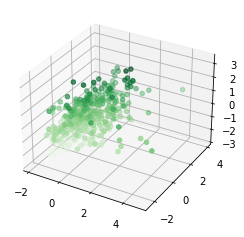

In [8]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = train["quantitative response of LC50"]
xdata = train["RDCHI"]
ydata = train["MLOGP"]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [9]:
trainX = pd.DataFrame(train[["RDCHI", "MLOGP"]])
trainX

,RDCHI,MLOGP
395,0.589025,-0.400444
275,-0.708133,0.668567
291,1.995923,1.092841
468,0.150063,-0.960785
410,-0.433165,0.303426
...,...,...
208,0.315290,-1.248419
211,-1.562629,-0.368294
259,-0.409737,0.457290
248,0.405302,2.386332


In [10]:
trainY = pd.DataFrame(train["quantitative response of LC50"])
trainY

,quantitative response of LC50
395,-0.294509
275,-0.212838
291,2.413850
468,0.662724
410,-0.028478
...,...
208,-1.380855
211,-0.827774
259,0.000948
248,2.270925


In [11]:
testX = pd.DataFrame(test[["RDCHI", "MLOGP"]])
testY = pd.DataFrame(test['quantitative response of LC50'])
testX

,RDCHI,MLOGP
236,-1.095307,-1.498735
274,-0.182858,0.936680
103,0.445992,-1.046329
463,-1.212446,-0.868926
175,-0.381377,0.242570
...,...,...
288,1.571757,0.560058
233,-1.212446,-0.133479
200,-0.313560,0.491164
235,-0.422068,-0.486562


In [12]:
testY

,quantitative response of LC50
236,-0.969497
274,0.505387
103,2.216278
463,-0.925058
175,0.521602
...,...
288,0.657920
233,-0.202029
200,-0.380384
235,-1.033753


In [13]:
valX = trainX[trainX.columns[:]].to_numpy()
valX = np.append(np.ones((436,1)), valX, axis=1)
valY = trainY[trainY.columns[:]].to_numpy()
np.shape(valX)
# np.reshape(valX, (436,3))

(436, 3)

In [14]:
np.shape(valY)

(436, 1)

In [15]:
valTestX = testX[testX.columns[:]].to_numpy()
valTestX = np.append(np.ones((110,1)), valTestX, axis=1)
valTestY = testY[testY.columns[:]].to_numpy()
np.shape(valTestX)

(110, 3)

In [16]:
np.shape(valTestY)

(110, 1)

In [17]:
iters = 1500000
learningRate = 0.001 #yeta or n
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)
TrainErrorArray = np.array([])
TestErrorArray = np.array([])

In [18]:
# Degree 1 here without regularization
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0))#del E
    # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2]
#     for j in range(np.shape(valX)[0]):
#         w2 += (((valY[j,0] - (w*valX[j,:wSize])))*valX[j,:wSize])/np.shape(valX)[0]

    #w2 = w2/np.shape(valX)[0] #N
    
    w1 = w - learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "= ", w[i], sep = '')


w0= 0.5467671780085145
w1= 0.567531755377248
w2= 0.6434763923290014


In [19]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
TrainErrorArray = np.append(TrainErrorArray, w1)
w1/np.shape(valX)[0]

1.1703055560415951

In [20]:
testError = 0
for i in range(np.shape(valTestX)[0]):
    testError += (np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2
    
TestErrorArray = np.append(TestErrorArray, testError)
testError/np.shape(valTestX)[0]

1.0191163560143703

In [21]:
# Reularization variables
LambdaArr = np.arange(0.01,1.01,0.01)
q = 0.5

In [22]:
# Finding optimal lambda for Degree 1 here with regularization q = 0.5
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)
TrainErrorArrayLambda = np.array([])
TestErrorArrayLambda = np.array([])

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for Lambda in LambdaArr:
    for i in range(iters):
        z = w.copy()
        z = z**(q-1)
        z[0] = 0
        w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0)) + Lambda*q*(z)/2
        # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2], z = [0,w1,w2]

        w1 = w - learningRate*w2
        if w1[0] - w[0] <= 10**(-20):
            w=w1
            break
        w=w1
        counter+=1
        costArr[counter] = w2[0]
        counterArr[counter] = counter
    
    ErrorLambdas = 0
    for i in range(np.shape(valX)[0]):
        ErrorLambdas += ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

    TrainErrorArrayLambda = np.append(TrainErrorArrayLambda, ErrorLambdas)
    
    testError = 0
    for i in range(np.shape(valTestX)[0]):
        testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

    TestErrorArrayLambda = np.append(TestErrorArrayLambda, testError)


minIndex = int(np.where(z == np.amin(z))[0])
print(minIndex)


Lambda = (minIndex+1)*0.01
print("Optimal Lambda = ", Lambda, sep = '')

C:\Users\Acer\AppData\Local\Temp\ipykernel_9452\715534281.py:15: RuntimeWarning: invalid value encountered in power
  z = z**(q-1)


0
Optimal Lambda = 0.01


In [23]:
# Degree 1 here with regularization q = 0.5
q = 0.5
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    z = w.copy()
    z = z**(q-1)
    z[0] = 0
    w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0)) + Lambda*q*(z)/2
    # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2], z = [0,w1,w2]
    
    w1 = w - learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   
print("Optimal Lambda =", Lambda)
for i in range(np.shape(w)[0]):    
    print("w", i, "= ", w[i], sep = '')


Optimal Lambda = 0.01
w0= 0.5467671780085145
w1= 0.567529255377248
w2= 0.6434738923290014


In [24]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TrainErrorArray = np.append(TrainErrorArray, w1)
w1/np.shape(valX)[0]

1.1817766595453172

In [25]:
testError = 0
for i in range(np.shape(valTestX)[0]):
    testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TestErrorArray = np.append(TestErrorArray, testError)
testError/np.shape(valTestX)[0]

1.030588709359393

In [26]:
# Degree 1 here with regularization q = 1
q = 1
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for Lambda in LambdaArr:
    for i in range(iters):
        z = np.array([0,1,1])
        w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0)) + Lambda*q*(z)/2
        # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2], z = [0,w1,w2]

        w1 = w - learningRate*w2
        if w1[0] - w[0] <= 10**(-20):
            w=w1
            break
        w=w1
        counter+=1
        costArr[counter] = w2[0]
        counterArr[counter] = counter

        ErrorLambdas = 0
        for i in range(np.shape(valX)[0]):
            ErrorLambdas += ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

        TrainErrorArrayLambda = np.append(TrainErrorArrayLambda, ErrorLambdas)

        testError = 0
        for i in range(np.shape(valTestX)[0]):
            testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

        TestErrorArrayLambda = np.append(TestErrorArrayLambda, testError)


minIndex = int(np.where(z == np.amin(z))[0])
print(minIndex)


Lambda = (minIndex+1)*0.01
print("Optimal Lambda = ", Lambda, sep = '')

   




0
Optimal Lambda = 0.01


In [27]:
# Degree 1 here with regularization q = 1
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    z = np.array([0,1,1])
    w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0)) + Lambda*q*(z)/2
    # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2], z = [0,w1,w2]
    
    w1 = w - learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "= ", w[i], sep = '')


w0= 0.5467671780085145
w1= 0.567526755377248
w2= 0.6434713923290014


In [28]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w))/2

TrainErrorArray = np.append(TrainErrorArray, w1)
w1/np.shape(valX)[0]

1.179087082824982

In [29]:
testError = 0
for i in range(np.shape(valTestX)[0]):
    testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TestErrorArray = np.append(TestErrorArray, testError)
testError/np.shape(valTestX)[0]

1.0279003824782666

In [30]:
# Degree 1 here with regularization q = 2
q = 2
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for Lambda in LambdaArr:
    for i in range(iters):
        z = w.copy()
        z[0]=0
        w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0)) + Lambda*q*(z**(q-1))/2
        # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2], z = [0,w1,w2]

        w1 = w - learningRate*w2
        if w1[0] - w[0] <= 10**(-20):
            w=w1
            break
        w=w1
        counter+=1
        costArr[counter] = w2[0]
        counterArr[counter] = counter
        
        ErrorLambdas = 0
        for i in range(np.shape(valX)[0]):
            ErrorLambdas += ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

        TrainErrorArrayLambda = np.append(TrainErrorArrayLambda, ErrorLambdas)

        testError = 0
        for i in range(np.shape(valTestX)[0]):
            testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

        TestErrorArrayLambda = np.append(TestErrorArrayLambda, testError)


minIndex = int(np.where(z == np.amin(z))[0])
print(minIndex)


Lambda = (minIndex+1)*0.01
print("Optimal Lambda = ", Lambda, sep = '')

0
Optimal Lambda = 0.01


In [31]:
# Degree 1 here with regularization q = 2
q = 2
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    z = w.copy()
    z[0]=0
    w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0)) + Lambda*q*(z**(q-1))/2
    # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2], z = [0,w1,w2]
    
    w1 = w - learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "= ", w[i], sep = '')


w0= 0.5467671780085145
w1= 0.567521755377248
w2= 0.6434663923290014


In [32]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TrainErrorArray = np.append(TrainErrorArray, w1)
w1/np.shape(valX)[0]

1.1754663779245191

In [33]:
testError = 0
for i in range(np.shape(valTestX)[0]):
    testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TestErrorArray = np.append(TestErrorArray, testError)
testError/np.shape(valTestX)[0]

1.0242821772499444

In [34]:
# Reularization variables
Lambda = np.exp(-7)
q = 4

In [35]:
# Degree 1 here with regularization q = 4
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for Lambda in LambdaArr:
    for i in range(iters):
        z = w.copy()
        z[0]=0
        w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0)) + Lambda*q*(z**(q-1))/2
        # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2], z = [0,w1,w2]

        w1 = w - learningRate*w2
        if w1[0] - w[0] <= 10**(-20):
            w=w1
            break
        w=w1
        counter+=1
        costArr[counter] = w2[0]
        counterArr[counter] = counter
        
        ErrorLambdas = 0
        for i in range(np.shape(valX)[0]):
            ErrorLambdas += ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

        TrainErrorArrayLambda = np.append(TrainErrorArrayLambda, ErrorLambdas)

        testError = 0
        for i in range(np.shape(valTestX)[0]):
            testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

        TestErrorArrayLambda = np.append(TestErrorArrayLambda, testError)


minIndex = int(np.where(z == np.amin(z))[0])
print(minIndex)


Lambda = (minIndex+1)*0.01
print("Optimal Lambda = ", Lambda, sep = '')

0
Optimal Lambda = 0.01


In [36]:
# Degree 1 here with regularization q = 4
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    z = w.copy()
    z[0]=0
    w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0)) + Lambda*q*(z**(q-1))/2
    # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2], z = [0,w1,w2]
    
    w1 = w - learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "= ", w[i], sep = '')


w0= 0.5467671780085145
w1= 0.567511755377248
w2= 0.6434563923290014


In [37]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TrainErrorArray = np.append(TrainErrorArray, w1)
w1/np.shape(valX)[0]

1.1720989996654188

In [38]:
testError = 0
for i in range(np.shape(valTestX)[0]):
    testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TestErrorArray = np.append(TestErrorArray, testError)
testError/np.shape(valTestX)[0]

1.0209197983100253

In [39]:
print(TrainErrorArray/np.shape(valX)[0])
print(TestErrorArray/np.shape(valTestX)[0])

[1.17030556 1.18177666 1.17908708 1.17546638 1.172099  ]
[1.01911636 1.03058871 1.02790038 1.02428218 1.0209198 ]
